In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Source: https://www.coursera.org/learn/machine-learning/resources/kGWsY

Dimensionality Reduction Algorithm (DRA)

- It is an unsupervised learning algorithm.

- We used DRA when we are suspicious that our data has lots of correlated/redundant features. Hence, it makes to compress these features into fewer features

- Example : Principal Component analysis


**Big Idea is to find that projection surface along which the projection error is minimized for the training data set.**

In other words, the goal of PCA is to reduce the average of all the distances of every feature to the projection line. This is the projection error.

**Principal component analysis creates variables that are linear combinations of the original variables. The new variables have the property that the variables are all orthogonal.**

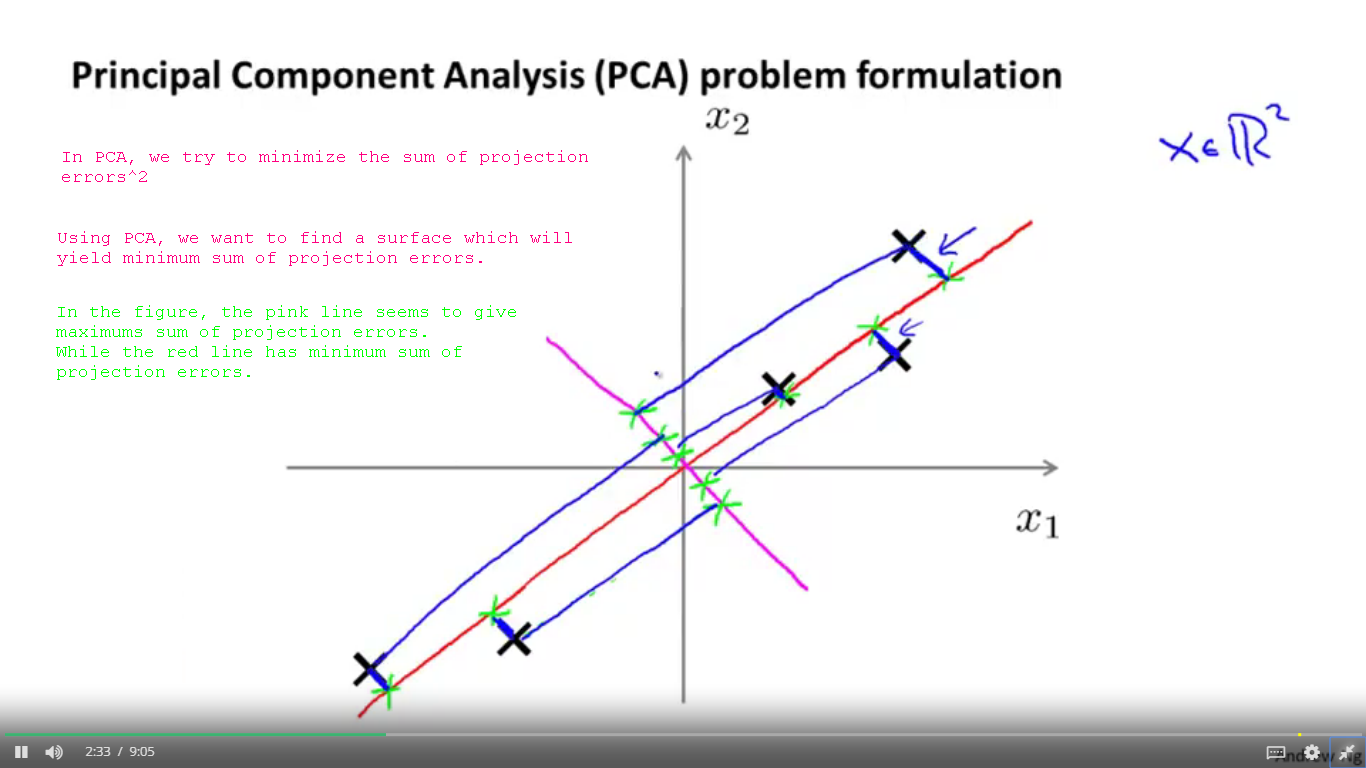

## Question to ask ourselves ?

1. In the case where $x^{(i)} \in \mathbb{R}^{3} $, how to determine direction of $u^{(1)}$ and $u^{(2)}$ ?

2. How to determine value of $z^{(i)}$ ?  

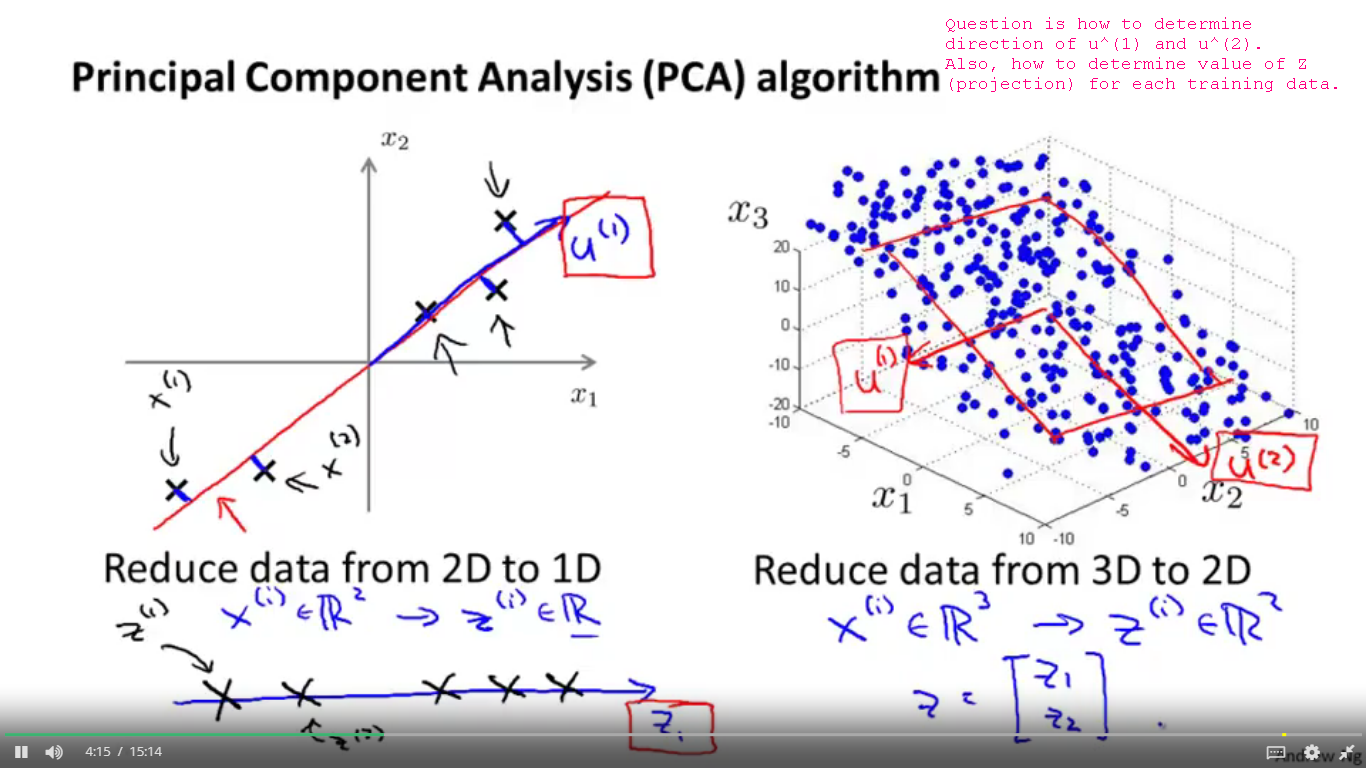

# Pending : How to compute a covariance matrix?

### IMP: It is important to do feature scaling because we are minimizing sum of distances from training examples to the projection surface. Hence, we don't want any one of the features to dominate.

In [2]:
# Sigma = (1/m) * X'* X    # compute the covariance matrix

# [U,S,V] = svd(Sigma);   # compute our projected directions

# Ureduce = U(:,1:k);     # take the first k directions/columns from U-matrix

# Z = X * Ureduce;        # compute the projected data points

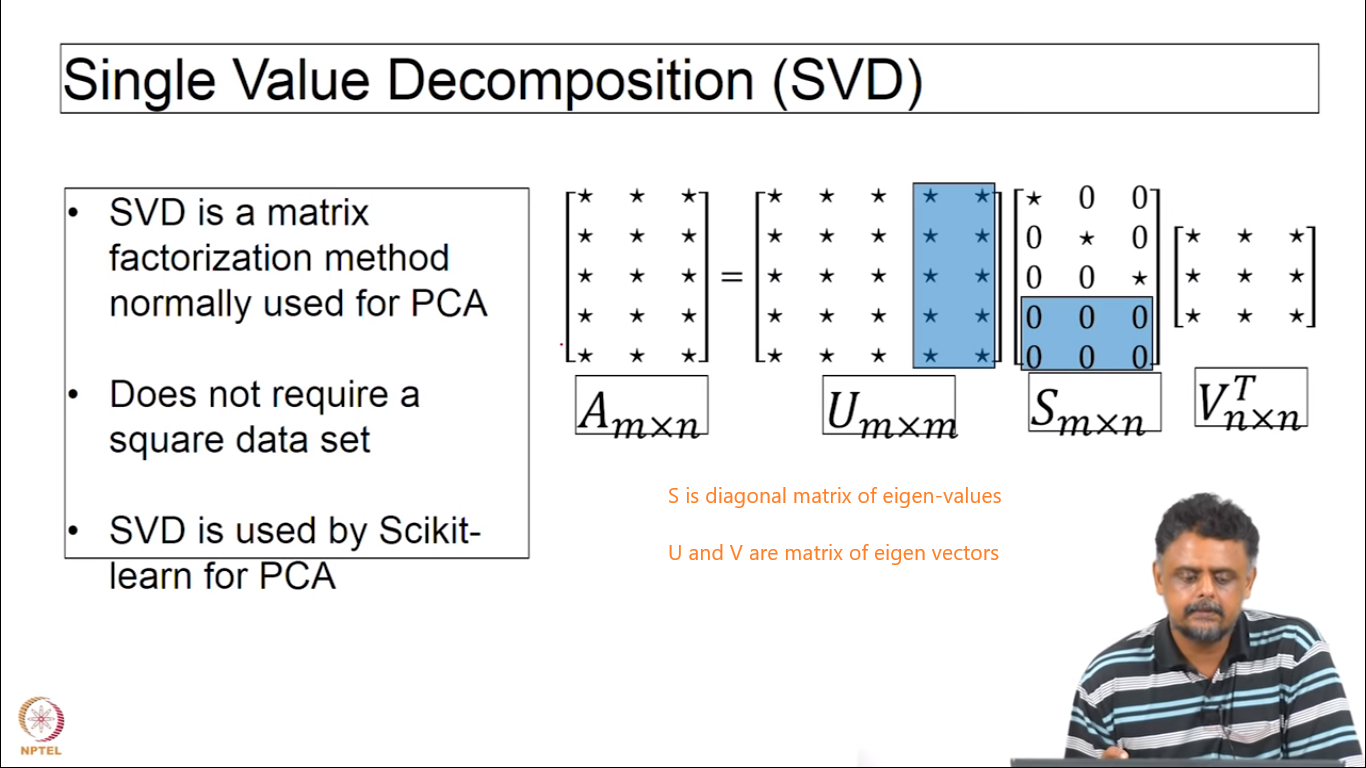

## Derivation of how to re-construct original data from compressed data

$ Z = U_{reduce}^{T} * x $   $ \hspace{10mm} $   where $ U_{reduce} \in \mathbb{R}^{n \times k}$  and $ x \in \mathbb{R}^{n \times 1}$



$ Z = U_{reduce}^{T} * x $ 


since $ U_{reduce}^{T} $ is a unitary matrix and we are dealing with real numbers,  we have $ U_{reduce}^{T} = U_{reduce}^{*} = U_{reduce}^{-1} $ 

the above relation leads us to an approximation
$ Z \sim U_{reduce}^{-1} * x $ and now multiplying $ U_{reduce} $ on both sides

$ U_{reduce}* Z \sim U_{reduce} * U_{reduce}^{-1} * x $ 

$ U_{reduce}* Z \sim I * x $ 

$ U_{reduce}* Z \sim x $ 

$ x_{approx} = U_{reduce}*Z  $ 


### How many Principal Components (K) should I choose ?

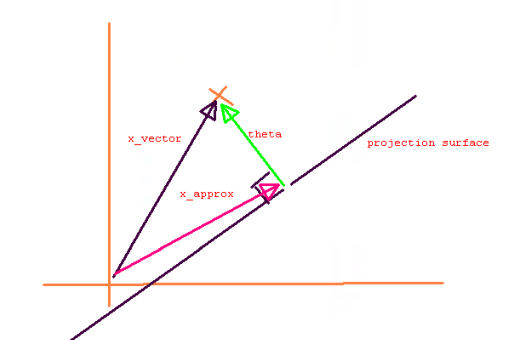

$ \overrightarrow{x} = \overrightarrow{ x_{approx} } + \overrightarrow{\theta} $ 

$ || \overrightarrow{\theta} ||  = || \overrightarrow{x} -  \overrightarrow{ x_{approx} } || $

Ideally we want $ || \overrightarrow{\theta} || $ to be as small as possible. Hence, we would like to choose a projection surface which minimises $ || \overrightarrow{\theta} || $ for all the training examples.

Hence, our criterion is to choose smallest value of $k$ (also known as # principal components) which ensures following: 

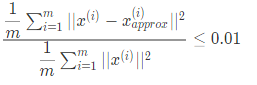

In other words, the squared projection error divided by the total variation should be less than one percent, so that 99% of the variance is retained.

Note: : Smaller value of numerator implies we are able to capture higher variation in the data after projecting the data on the projection surface. Also, the denominator captures the total (average) variation in the data. If numerator becomes ZERO, it means all the training data has been captured and lie on the projection surface (i.e 100% variance is retained).

Efficient way of choosing # components is to use the $S$ matrix obtained from svd, which ensures that atleast 99% of variation is captured

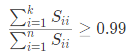

## Implementation note

* Mostly, we use PCA for classification problem


* We should use PCA on the training data only and then obtain U_reduce. We should then apply U_reduce obtained from training data over Cross-validation and Test set to compress the data. It is like PCA gives us parameters which should be obtained only using training set. 


* Bad use of PCA: trying to prevent overfitting. We might think that reducing the features with PCA would be an effective way to address overfitting. It might work, but is not recommended because it does not consider the values of our results y. Because we don't take into account values of y while doing PCA.. hence we throw that information

    Hence,  using just regularization will be at least as effective.


* Don't assume you need to do PCA. Try your full machine learning algorithm without PCA first. Then use PCA if you find that you need it.






In [5]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
df = pd.DataFrame(data= cancer['data'], columns= cancer['feature_names']   )
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# it is important to feature scale the data before using PCA
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_data = scaler.transform(df)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [24]:
# ensure that PCA is used on feature scaled data and NOT on raw data
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
#u_reduce matrix is nxk... in this case it is n=30 and k=2
# x_pca = X * u_reduce ( mxn * nxk )

x_pca = pca.transform(scaled_data)
x_pca.shape

(569, 2)

In [28]:
scaled_data.shape

(569, 30)

In [29]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

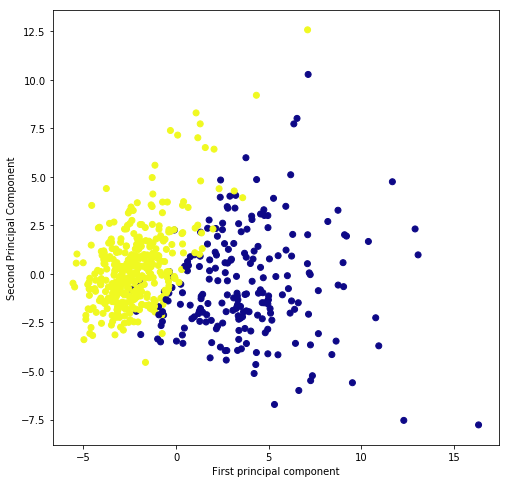

In [35]:
plt.figure( figsize= (8,8))
plt.scatter( x_pca[:,0] ,  x_pca[:,1] , c=cancer['target'], cmap='plasma' )
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [38]:
# is equal to u_reduce (nxk)
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [42]:
# data frame which tells what is the value of princiapl component for each feature
df_comp = pd.DataFrame(data = pca.components_ , columns= cancer['feature_names']  )

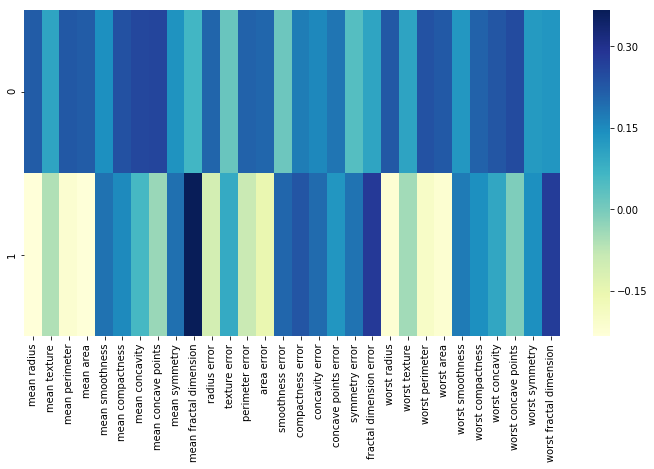

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='YlGnBu')

Pending : How to choose the # components automatically 